<a href="https://colab.research.google.com/github/AbdhMohammady/DataScience/blob/main/DataMinning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   [**Import libraries**](#Import-libraries)
*   **Preparing divace and data**
  *   Install graphviz
  *   Mount google drive
  *   prepare default values
*   **Functions defination**
  *   [**Confusion Matrix method**](#confusion-matrix-method-defination)
  *   [**Find Outliers method**](#find-outliers-method-defination)
  *   [**Add value labels method**](#add-value-labels-method-defination)
  *   [**Plot ROC curve method**](#plot-ROC-method-defination)
*   [**Preprocessing**](#Preprocessing)
  *   Reading dataset
  *   Check missing data
  *   Outliers
  *   [**Target column**](#Target-Column)
  
          changing type of column 'G3' to classified values 'Passed' and 'Failure'
               
  * [**Decode categorical columns**](#Decode)
      
      Decode columns 'sex', 'address' and 'gaurdian' to {0,1} data
            
  *   [**Split train and test**](#Split-data)
    
* [**Decision tree**](#dtree)
    *   [Display graph](#Decision-tree-graph)
* [**Random forest**](#Random-Forest)
* [**Logestic regression**](#Logestic-Regression)
* [**SVM**](#SVM)
* [**Neural Network**](#Neural-Network)
* [**Confusion Matrix heatmap**](#ConfusionMatrix)
* [**Validation Chart**](#Validation-Chart)
* [**ROC Curves**](#ROC-CURVES)

# <a name="Import-libraries"><h1><b>Import libraries</b></h1></a>

In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn.metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,plot_confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score
from google.colab import drive


In [ ]:
#pip install graphviz
import graphviz


Mount drive and prepare defualt values

In [ ]:
drive.mount('/content/drive')
#Enable this line when running from colab
data_path =r'/content/drive/MyDrive/DATA/Student-Performance-with-missing.csv'

#Enable this line when running from local device
#data_path =r'Student-Performance-with-missing.csv'
models = ['Decition Tree', 'Random Forest', 'LogRegression', 'SVM', 'Neural Network']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <a name="confusion-matrix-method-defination"><h1><b>Confusion matrix</b></h1></a>

In [ ]:
def compute_confusion_matrix(actual, predicted):

    # extract the different classes
    classes = np.unique(actual)

    # initialize the confusion matrix
    confmat = np.zeros((len(classes), len(classes)))

    # loop across the different combinations of actual / predicted classes
    for i in range(len(classes)):
        for j in range(len(classes)):

           # count the number of instances in each combination of actual / predicted classes
           confmat[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))

    return confmat

# <a name="find-outliers-method-defination"><h1><b>find_outliers_IQR method</b></h1></a>

In [ ]:
#create a function to find outliers using IQR
def find_outliers_IQR(df,out_range=1.5):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-out_range*IQR)) | (df>(q3+out_range*IQR)))]

   return outliers

# <a name="add-value-labels-method-defination"><h1><b>add_value_labels method</b></h1></a>

In [ ]:
def add_value_labels(ax, spacing=5):
    #Add labels to the end of each bar in a bar chart.
    #Arguments:
    #    ax (matplotlib.axes.Axes): The matplotlib object containing the axes of the plot to annotate.
    #    spacing (int): The distance between the labels and the bars.
  
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.3f}".format(y_value)

        # Create annotation
        ax.annotate(label,                      # Use `label` as label
                   (x_value, y_value),         # Place label at end of the bar
                    xytext=(0, space),          # Vertically shift label by `space`
                    textcoords="offset points", # Interpret `xytext` as offset in points
                    ha='center',                # Horizontally center label
                    va=va)                      # Vertically align label differently for


# <a name="plot-ROC-method-defination"><h1><b>plot_ROC method</b></h1></a>

In [ ]:
def plot_ROC(y_onehot_test,y_score,title):
  RocCurveDisplay.from_predictions(y_onehot_test,y_score,name=f"{class_of_interest} vs the rest",color="darkorange")

  plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
  plt.axis("square")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(title)
  
  plt.legend()

  plt.show()


# <a name="Preprocessing"><h1><b>Preprocessing</b></h1></a>

***Reading dataset***

In [ ]:
df = pd.read_csv(data_path)

df.head()

,sex,age,Medu,Fedu,studytime,failures,famrel,freetime,health,absences,address,guardian,G3
0,F,18.0,4,4,2,0,4,3.0,3,6,U,mother,6
1,F,NaN,1,1,2,0,5,3.0,3,4,U,father,6
2,F,15.0,1,1,2,3,4,NaN,3,10,U,mother,10
3,F,15.0,4,2,3,0,3,2.0,5,2,U,mother,15
4,F,16.0,3,3,2,0,4,3.0,5,4,U,father,10


**Check and print missing data**

In [ ]:
# Checking for missing values in dataset
for c in df.columns: print('Total Missing values in \'{}\' are {}.'.format(c,df[c].isna().sum()))

Total Missing values in 'sex' are 0.
Total Missing values in 'age' are 17.
Total Missing values in 'Medu' are 0.
Total Missing values in 'Fedu' are 0.
Total Missing values in 'studytime' are 0.
Total Missing values in 'failures' are 0.
Total Missing values in 'famrel' are 0.
Total Missing values in 'freetime' are 7.
Total Missing values in 'health' are 0.
Total Missing values in 'absences' are 0.
Total Missing values in 'address' are 0.
Total Missing values in 'guardian' are 24.
Total Missing values in 'G3' are 0.


***Decision making about missing data***

In [ ]:
#Replace mean of 'age' column for each missing value
age_mean = int(df["age"].mean())
df['age'] = df['age'].fillna(age_mean)

#Replace mean of 'freetime' column for each missing value
freetime_mean =int(df["freetime"].mean())
df['freetime'] = df['freetime'].fillna(age_mean)

guardian =['mother','father','father']
#Replace random selection of 'mother' and 'father' for each missing value of 'gradiant' column
for i in range(len(df["guardian"])):
  if pd.isnull(df["guardian"][i]):
     df.at[i,"guardian"] = np.random.choice(guardian)


***Outliers***

In [ ]:
#Checking outliers for 'freetime' and 'G3'
g3_outliers = find_outliers_IQR(df['G3'],out_range=1.5)

print('Column ''G3''\nNumber of outliers: '+ str(len(g3_outliers)))

print('Max outlier value: '+ str(g3_outliers.max()))

print('Min outlier value: '+ str(g3_outliers.min()))

g3_outliers

Column G3
Number of outliers: 0
Max outlier value: nan
Min outlier value: nan


Series([], Name: G3, dtype: int64)

The above result shows that there is no outlier data in column G3

We will Checking outliers for 'freetime'

In [ ]:
#Checking outliers for 'freetime'
freetime_outliers = find_outliers_IQR(df['freetime'],out_range=2.5)

print('Column ''\'freetime\'''\nNumber of outliers: '+ str(len(freetime_outliers)))

print('Max outlier value: '+ str(freetime_outliers.max()))

print('Min outlier value: '+ str(freetime_outliers.min()))

freetime_outliers

Column 'freetime'
Number of outliers: 7
Max outlier value: 16.0
Min outlier value: 16.0


2      16.0
48     16.0
94     16.0
141    16.0
210    16.0
279    16.0
371    16.0
Name: freetime, dtype: float64

**drop outliers**

In [ ]:
#detect index of each outliers
indexes = freetime_outliers.index.to_list()

#drop rows of the outliers from dataframe
if len(indexes)>0 : df.drop(indexes,0,inplace=True)


<ipython-input-14-30205bb93b89>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if len(indexes)>0 : df.drop(indexes,0,inplace=True)


<a name="Target-Column"><h1><b>Target column manipolation</b></h1></a>

In [ ]:
#Generate new column and set 'Passed' as default value

df['G'] ='Passed'

#Update values of column 'G' asosioted by values of 'G3'.
#if each value of 'G3' is lower than 10, value of 'G' changes to 'Failure'
for i, row in df.iterrows():
     if df.at[i,'G3']<10 : df.at[i,'G'] = 'Failure'
         
#remove 'G3'
del df['G3']

#rename 'G' to 'G3'
df.rename(columns = {'G':'G3'}, inplace = True)

<a name="Decode"><h1><b>Decode categorical columns</b></h1></a>

In [ ]:
df['sex'] = df['sex'].map({'M': 0, 'F': 1})
df['address'] = df['address'].map({'U': 0, 'R': 1})
df['guardian'] = df['guardian'].map({'mother': 0, 'father': 1})


<a name="Split-data"><h1><b>Split train and test</b></h1></a>

In [ ]:
#Columns 0 - 11 for predicate
predictors = df.values[:, 0:11]
#G3
targets = df.values[:,12]

features = list(df.columns[:11])

pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size= 0.25)

print("Trian shape ",pred_train.shape)
print("Test shape ",pred_test.shape)
print("Target trian shape ",tar_train.shape)
print("Target test shape ",tar_test.shape)

Trian shape  (587, 11)
Test shape  (196, 11)
Target trian shape  (587,)
Target test shape  (196,)


# <a name="dtree"><h1><b>Decision Tree</b></h1></a>

In [ ]:
decision_classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 1, splitter='best',max_depth=5)

decision_classifier = decision_classifier.fit(pred_train,tar_train)

#Predict Output
decision_tree_predicated = decision_classifier.predict(pred_test)

#print("\n\nCalssification report:\n",classification_report(tar_test, decision_tree_predicated))

<a name='Decision-tree-graph'><h1>Decision tree graph</h1></a>

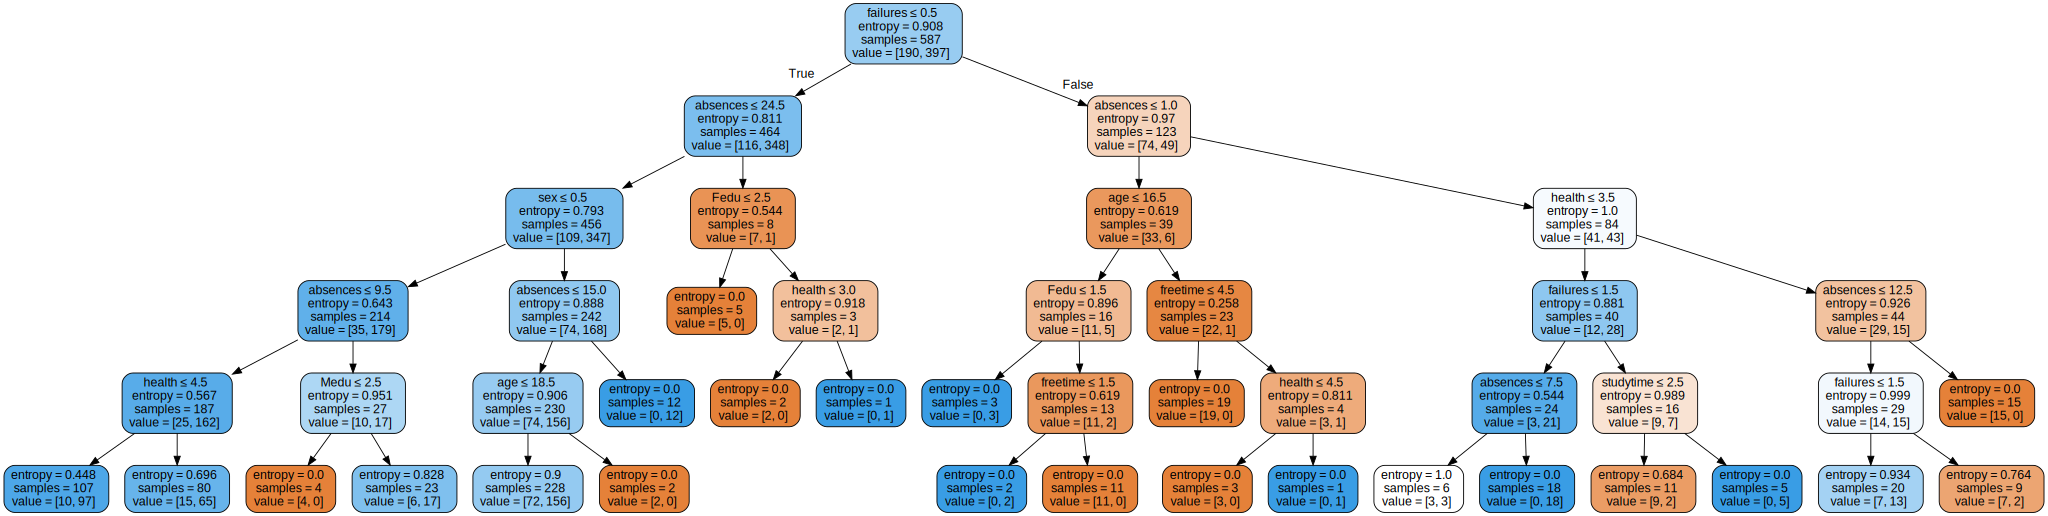

In [ ]:
# DOT data
dot_data = tree.export_graphviz(decision_classifier, out_file=None,feature_names=features, filled=True,rounded=True,special_characters=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


# <a name="Random-Forest"><h1><b>Random forest</b></h1></a>

In [ ]:
#Import Library
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest object
forest_classifier = RandomForestClassifier()

# Train the model using the training sets and check score
forest_classifier.fit(pred_train,tar_train)

#Predict Output
forest_predicated = forest_classifier.predict(pred_test)

#print("\n\nCalssification report:\n",classification_report(tar_test, forest_predicated))


<a name='random-forest-graph'><h1>Random forest graph</h1></a>

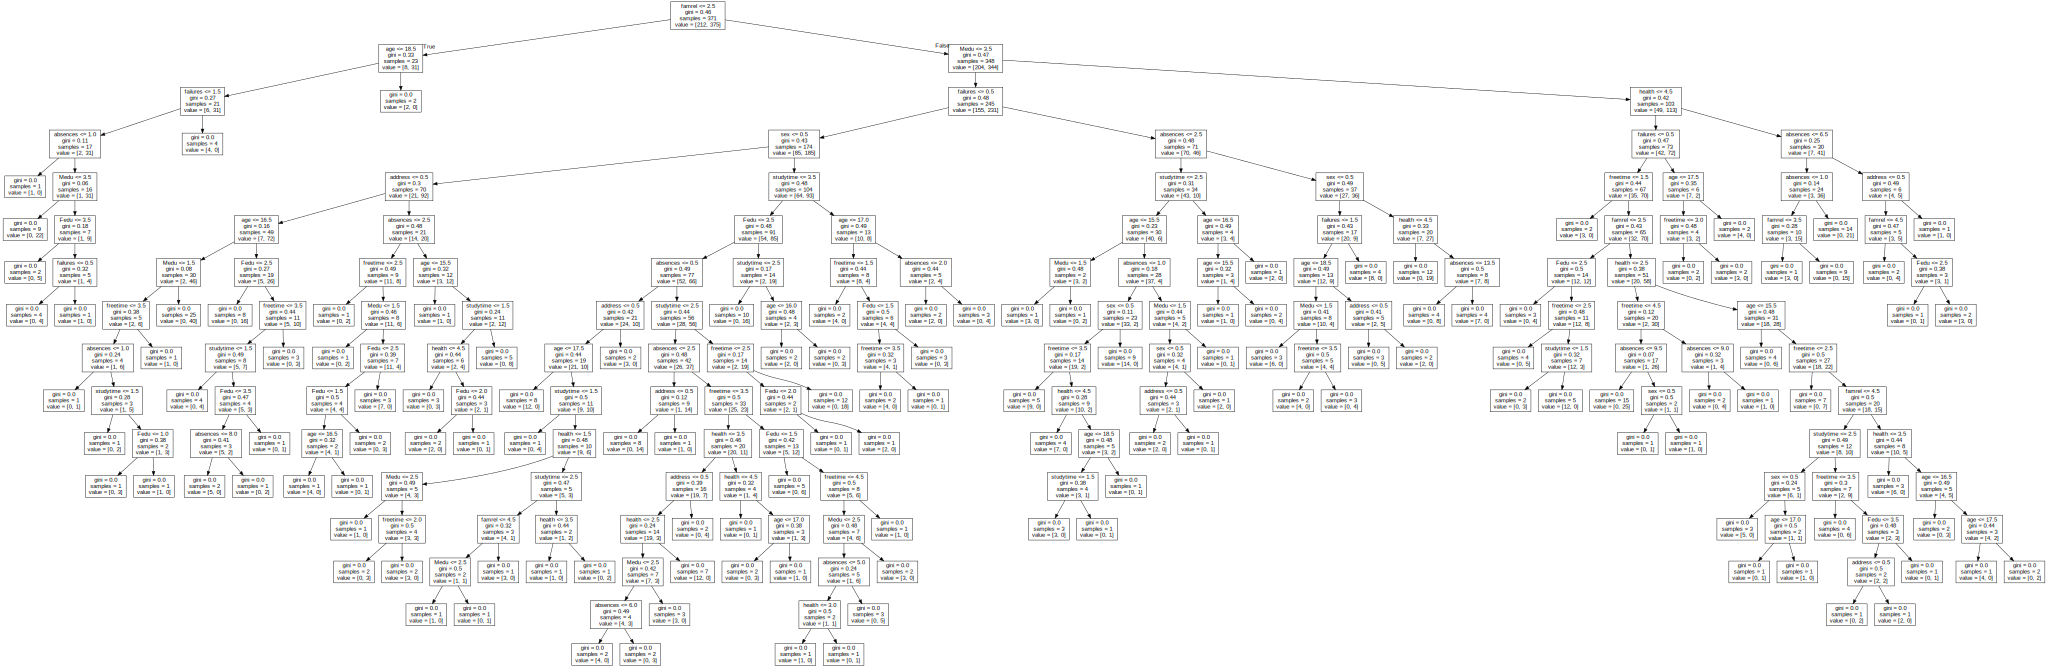

In [ ]:
# DOT data
dot_data = export_graphviz(forest_classifier.estimators_[0], out_file=None,feature_names = features,precision = 2, filled = False)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# <a name="Logestic-Regression"><h1><b>Logestic Regression</b></h1></a>

In [ ]:
from sklearn.linear_model import LogisticRegression

logregression_classifier = LogisticRegression()

logregression_classifier.fit(pred_train, tar_train)

logregression_predicated = logregression_classifier.predict(pred_test)

#print("\n\nCalssification report:\n",classification_report(tar_test, logregression_predicated))


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# <a name="SVM"><h1><b>SVM (Support Vector Machine)</b></h1></a>

In [ ]:
from sklearn import svm

svm_classifier = svm.SVC(kernel='rbf',probability=True, C=1000, gamma=1000)

svm_classifier.fit(pred_train,tar_train)

svm_predicated = svm_classifier.predict(pred_test)

#accuracy
svm_classifier_acuracy = accuracy_score(tar_test, svm_predicated, normalize = True)

#print("\n\nCalssification report:\n",classification_report(tar_test, svm_predicated))


# <a name="Neural-Network"><h1><b>Neural Network</b></h1></a>

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=1, max_iter=300)
mlp_classifier.fit(pred_train,tar_train)

mlp_predicated = mlp_classifier.predict(pred_test)

#accuracy
mlp_classifier_acuracy = accuracy_score(tar_test, mlp_predicated, normalize = True)

#print("\n\nCalssification report:\n",classification_report(tar_test, mlp_predicated))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


<a name= 'compare-models'>Calculation of parameters to compare models</a>

In [ ]:
#Decision tree
decision_tree_matrix = compute_confusion_matrix(tar_test,decision_tree_predicated)

#Accuracy formula = (TN+TP)/All
decision_classifier_acuracy = (decision_tree_matrix[0,0]+decision_tree_matrix[1,1])/(decision_tree_matrix[0,0]+decision_tree_matrix[0,1]+decision_tree_matrix[1,0]+decision_tree_matrix[1,1])
#Error rate
decision_classifier_error = 1- decision_classifier_acuracy 
#Recall(Sensitivity)
decision_classifier_sensitivity = (decision_tree_matrix[0,0])/(decision_tree_matrix[0,0]+decision_tree_matrix[0,1])
#Specificity
decision_classifier_specificity = (decision_tree_matrix[0,0])/(decision_tree_matrix[0,0]+decision_tree_matrix[1,0])

print("Decision tree\n")

print("Accuracy:",decision_classifier_acuracy)

print("Classification error:",decision_classifier_error)

print("Sensitivity:", decision_classifier_sensitivity)

print("Specificity:",decision_classifier_specificity)

#Random forest
random_forest_matrix = compute_confusion_matrix(tar_test,forest_predicated)

#Accuracy formula = (TN+TP)/All
forest_classifier_acuracy = (random_forest_matrix[0,0]+random_forest_matrix[1,1])/(random_forest_matrix[0,0]+random_forest_matrix[0,1]+random_forest_matrix[1,0]+random_forest_matrix[1,1])
#Error rate
forest_classifier_error = 1- forest_classifier_acuracy 
#Recall(Sensitivity)
forest_classifier_sensitivity = (random_forest_matrix[0,0])/(random_forest_matrix[0,0]+random_forest_matrix[0,1])
#Specificity
forest_classifier_specificity = (random_forest_matrix[0,0])/(random_forest_matrix[0,0]+random_forest_matrix[1,0])

print("\nRandom forest")
print("Accuracy:",forest_classifier_acuracy)

print("Classification error:",forest_classifier_error)

print("sensitivity:", forest_classifier_sensitivity)

print("specificity:",forest_classifier_specificity)

#Logestic Regression
logestic_regression_matrix = compute_confusion_matrix(tar_test,logregression_predicated)

#Accuracy formula = (TN+TP)/All
logregression_classifier_acuracy = (logestic_regression_matrix[0,0]+logestic_regression_matrix[1,1])/(logestic_regression_matrix[0,0]+logestic_regression_matrix[0,1]+logestic_regression_matrix[1,0]+logestic_regression_matrix[1,1])
#Error rate
logregression_classifier_error = 1- logregression_classifier_acuracy 
#Recall(Sensitivity)
logregression_classifier_sensitivity = (logestic_regression_matrix[0,0])/(logestic_regression_matrix[0,0]+logestic_regression_matrix[0,1])
#Specificity
logregression_classifier_specificity = (logestic_regression_matrix[0,0])/(logestic_regression_matrix[0,0]+logestic_regression_matrix[1,0])

print("\nLogestic Regression")
print("Accuracy:",logregression_classifier_acuracy)

print("Classification error:",1-logregression_classifier_acuracy)

print("Sensitivity:", logregression_classifier_sensitivity)

print("Specificity:",logregression_classifier_specificity)

#SVM
svm_matrix = compute_confusion_matrix(tar_test,svm_predicated)
#Accuracy formula = (TN+TP)/All
svm_classifier_acuracy = (svm_matrix[0,0]+svm_matrix[1,1])/(svm_matrix[0,0]+svm_matrix[0,1]+svm_matrix[1,0]+svm_matrix[1,1])
#Error rate
svm_classifier_error = 1- svm_classifier_acuracy 
#Recall(Sensitivity)
svm_classifier_sensitivity = (svm_matrix[0,0])/(svm_matrix[0,0]+svm_matrix[0,1])
#Specificity
svm_classifier_specificity = (svm_matrix[0,0])/(svm_matrix[0,0]+svm_matrix[1,0])

print("\nSVM")

print("Accuracy:",svm_classifier_acuracy)

print("Classification Error:",svm_classifier_error)

print("Sensitivity:", svm_classifier_sensitivity)

print("Specificity:",svm_classifier_specificity)

#Neural network
mlp_matrix = compute_confusion_matrix(tar_test,mlp_predicated)

#Accuracy formula = (TN+TP)/All
mlp_classifier_acuracy = (mlp_matrix[0,0]+ mlp_matrix[1,1])/(mlp_matrix[0,0]+ mlp_matrix[0,1]+ mlp_matrix[1,0]+ mlp_matrix[1,1])
#Error rate
mlp_classifier_error = 1- mlp_classifier_acuracy 
#Recall(Sensitivity)
mlp_classifier_sensitivity = (mlp_matrix[0,0])/(mlp_matrix[0,0]+mlp_matrix[0,1])
#Specificity
mlp_classifier_specificity = (mlp_matrix[0,0])/(mlp_matrix[0,0]+mlp_matrix[1,0])


confusion_matrices = [decision_tree_matrix,random_forest_matrix,logestic_regression_matrix,svm_matrix,mlp_matrix]

print("\nNeural Network")

print("Accuracy:",mlp_classifier_acuracy)

print("Classification error:",mlp_classifier_error)

print("Sensitivity:", mlp_classifier_sensitivity)

print("Specificity:",mlp_classifier_specificity)


Decision tree

Accuracy: 0.7908163265306123
Classification error: 0.2091836734693877
Sensitivity: 0.4264705882352941
Specificity: 0.9354838709677419

Random forest
Accuracy: 0.8928571428571429
Classification error: 0.1071428571428571
sensitivity: 0.7205882352941176
specificity: 0.9607843137254902

Logestic Regression
Accuracy: 0.7244897959183674
Classification error: 0.2755102040816326
Sensitivity: 0.3235294117647059
Specificity: 0.7333333333333333

SVM
Accuracy: 0.8724489795918368
Classification Error: 0.12755102040816324
Sensitivity: 0.6323529411764706
Specificity: 1.0

Neural Network
Accuracy: 0.7551020408163265
Classification error: 0.24489795918367352
Sensitivity: 0.4264705882352941
Specificity: 0.7631578947368421


# <a name="ConfusionMatrix"><h1><b>Confusion Matrix</b></h1></a>

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

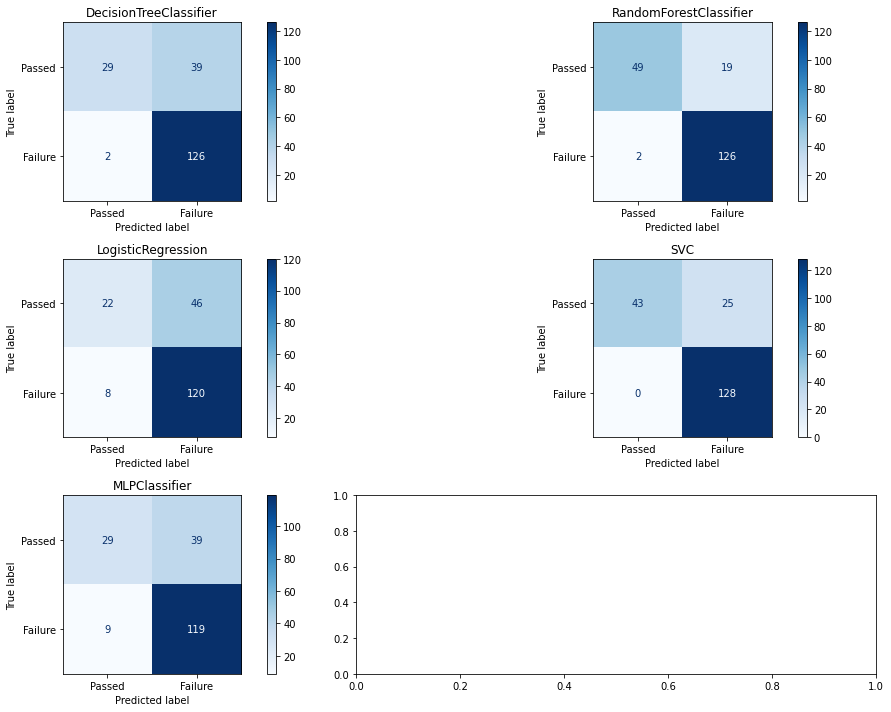

In [ ]:

classifiers = [decision_classifier, forest_classifier,logregression_classifier, svm_classifier,mlp_classifier]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
i=0
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, pred_test, tar_test, ax=ax, cmap='Blues', display_labels=['Passed','Failure'])
    ax.title.set_text(type(cls).__name__)
   
plt.tight_layout()  
plt.show()


# <a name="Validation-Chart"><h1><b>Models validation chart</b></h1></a>

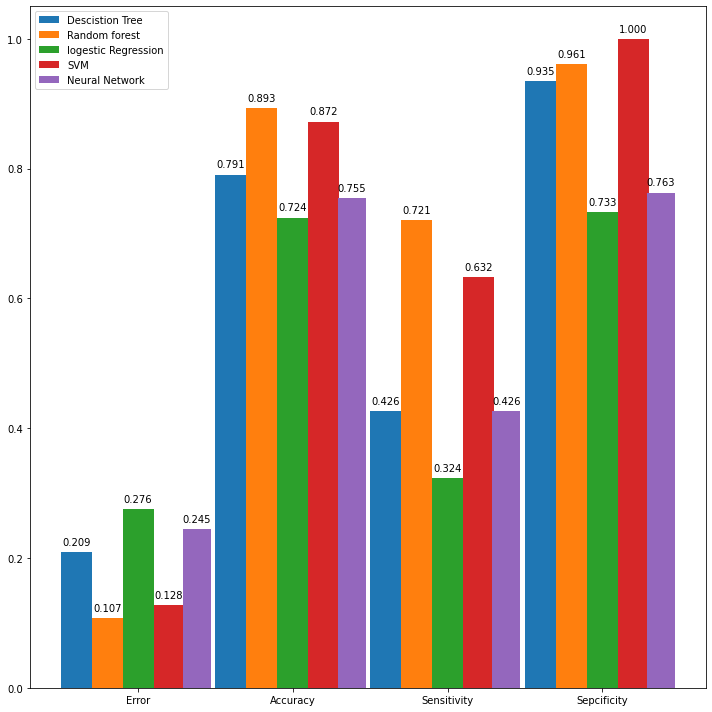

In [ ]:
labels = ["Error","Accuracy","Sensitivity","Sepcificity"]

d = [decision_classifier_error,decision_classifier_acuracy,decision_classifier_sensitivity,decision_classifier_specificity]

f = [forest_classifier_error,forest_classifier_acuracy,forest_classifier_sensitivity,forest_classifier_specificity]

l = [logregression_classifier_error,logregression_classifier_acuracy,logregression_classifier_sensitivity,logregression_classifier_specificity]

s = [svm_classifier_error,svm_classifier_acuracy,svm_classifier_sensitivity,svm_classifier_specificity]

m = [mlp_classifier_error,mlp_classifier_acuracy,mlp_classifier_sensitivity,mlp_classifier_specificity]

x = np.arange(len(labels))  # the label locations

width = 0.2  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x -2*width, d, width, label='Descistion Tree')

rects2 = ax.bar(x -1*width , f, width, label='Random forest')

rects3 = ax.bar(x  , l, width, label='logestic Regression')

rects4 = ax.bar(x + 1*width, s, width, label='SVM')

rects5 = ax.bar(x + 2*width-0.02, m, width-0.02, label='Neural Network')

plt.rcParams["figure.figsize"] = [10, 10]
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('')
ax.set_title('')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
ax.legend()
add_value_labels(ax)

fig.tight_layout()

plt.show()


# <a name="ROC-CURVES"><h1><b>ROC curves</b></h1></a>

In [ ]:
#In this section we use a LabelBinarizer to binarize the target by one-hot-encoding in a OvR fashion.
#This means that the target of shape (n_samples,) is mapped to a target of shape (n_samples, n_classes).

label_binarizer = LabelBinarizer().fit(tar_train)
y_onehot_test = label_binarizer.transform(tar_test)
y_onehot_test.shape  # (n_samples, n_classes)
#We can as well easily check the encoding of a specific class:
label_binarizer.transform(["Passed"])
#In the following plot we show the resulting ROC curve when regarding the students as either “passed” (class_id=1) or “failure” (the rest).
class_of_interest = "Passed"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]


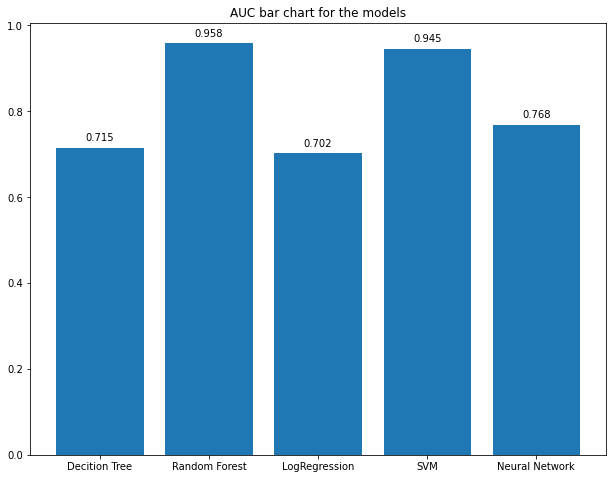

In [ ]:
n_classes = len(np.unique(tar_train))
#n_classes
decistion_tree_y_score = decision_classifier.predict_proba(pred_test)

forest_y_score = forest_classifier.predict_proba(pred_test)

regression_y_score =logregression_classifier.predict_proba(pred_test)

svm_y_score = svm_classifier.predict_proba(pred_test)

mlp_y_score = mlp_classifier.predict_proba(pred_test)


decision_tree_auc = roc_auc_score(y_onehot_test[:, 0], decistion_tree_y_score[:, class_id])
random_forest_auc = roc_auc_score(y_onehot_test[:, 0], forest_y_score[:, class_id])
regression_auc = roc_auc_score(y_onehot_test[:, 0], regression_y_score[:, class_id])
svm_auc = roc_auc_score(y_onehot_test[:, 0], svm_y_score[:, class_id])
mlp_auc = roc_auc_score(y_onehot_test[:, 0], mlp_y_score[:, class_id])

fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
acu_values = [decision_tree_auc,random_forest_auc,regression_auc,svm_auc,mlp_auc]
ax.bar(models,acu_values)

ax.set_title("AUC bar chart for the models")
# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()

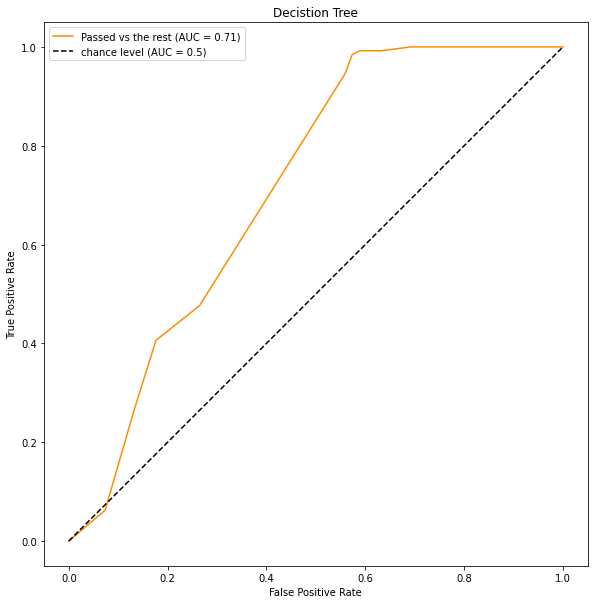

In [ ]:
plot_ROC(y_onehot_test[:, 0],decistion_tree_y_score[:, class_id],"Decistion Tree")

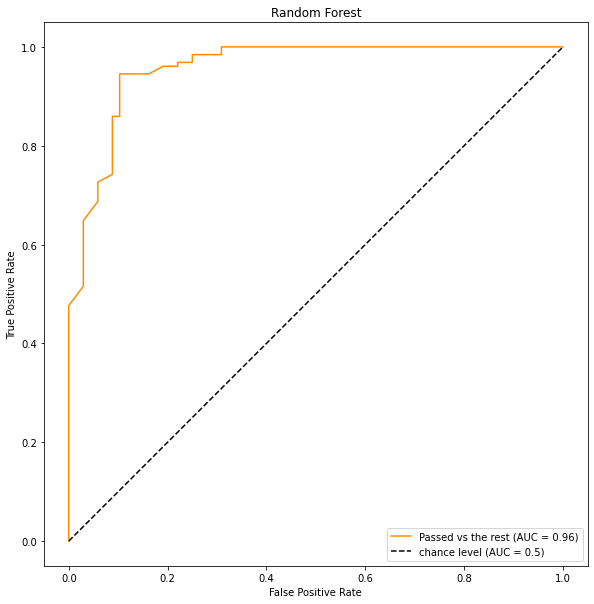

In [ ]:
plot_ROC(y_onehot_test[:, 0],forest_y_score[:, class_id],"Random Forest")

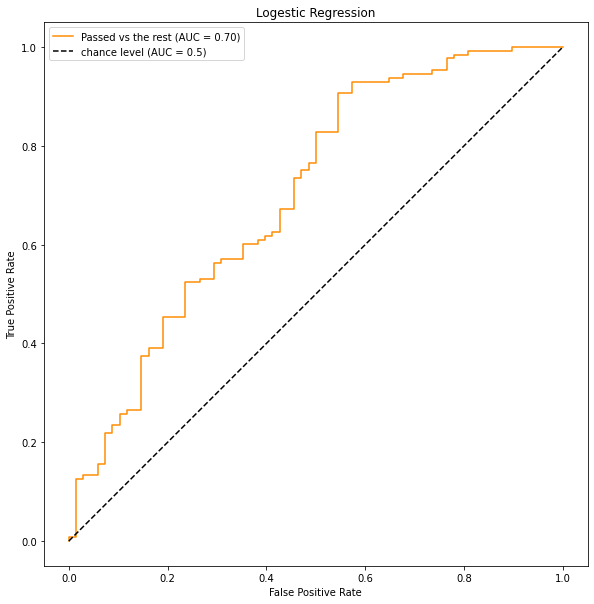

In [ ]:
plot_ROC(y_onehot_test[:, 0],regression_y_score[:, class_id],"Logestic Regression")

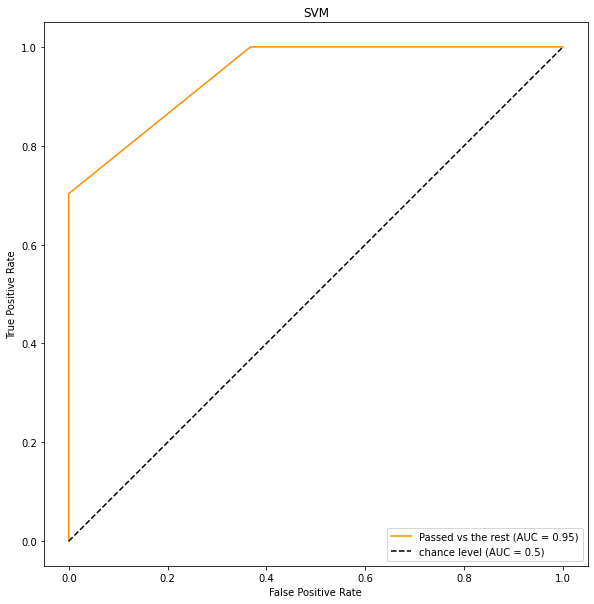

In [ ]:
plot_ROC(y_onehot_test[:, 0],svm_y_score[:, class_id],"SVM")

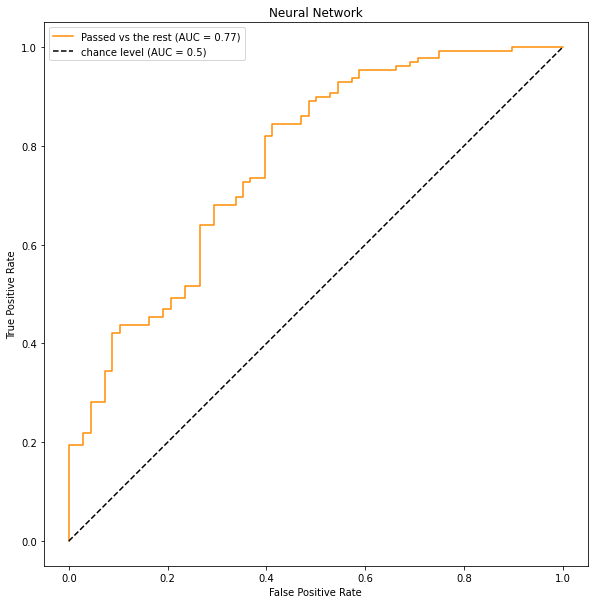

In [ ]:
plot_ROC(y_onehot_test[:, 0],mlp_y_score[:, class_id],"Neural Network")